In [ ]:
!pip install xgboost==1.7.6 seaborn==0.13.2 --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_recall_fscore_support
)

import xgboost as xgb

pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 200)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 1.2 MB/s eta 0:00:00


In [ ]:

csv_path = "/content/OD-IDS2022-Dataset.csv"

df = pd.read_csv(csv_path)
print("Shape:", df.shape)
df.head()


Shape: (1031916, 82)


,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,198.51.100.116,58598,172.217.163.129,443,6,114748,12,9,788,5944,513,0,65.666667,151.076340,1418,0,660.444444,671.573918,58667.689200,183.009726,5737.400000,10358.467620,32278,0,92366,8396.909091,17106.870940,55469,72,113723,14215.37500,15398.00632,32670,0,0,0,0,0,396,304,104.576986,78.432740,0,1418,306.000000,524.476701,2.750758e+05,0,1,0,0,0,0,0,0,0,320.571429,65.666667,660.444444,0,0,0,0,0,0,12,788,9,5944,-1,265,4,0,0.0,0.0,0,0,0.0,0.0,0,0,Apache_flink_directory_traversal
1,198.51.100.116,34538,54.246.133.196,443,6,1782409,9,8,910,4962,431,0,101.111111,149.201579,1448,0,620.250000,664.542539,3294.417836,9.537654,111400.562500,128332.606700,366748,0,1356007,169500.875000,131174.926500,366784,125,1782409,254629.85710,219962.74720,699756,0,0,0,0,0,300,272,5.049346,4.488308,0,1448,326.222222,515.838615,2.660895e+05,0,1,0,0,0,0,0,0,0,345.411765,101.111111,620.250000,0,0,0,0,0,0,9,910,8,4962,-1,258,4,0,0.0,0.0,0,0,0.0,0.0,0,0,Apache_flink_directory_traversal
2,198.51.100.116,34538,54.246.133.196,443,6,7619,3,2,85,1448,85,0,28.333333,49.074773,1448,0,724.000000,1023.890619,201207.507500,656.254102,1904.750000,3441.199440,7065,75,7345,3672.500000,4797.719510,7065,280,199,199.00000,0.00000,199,199,0,0,0,0,96,76,393.752461,262.501641,0,1448,255.500000,585.191849,3.424495e+05,0,0,0,0,1,0,0,0,0,306.600000,28.333333,724.000000,0,0,0,0,0,0,3,85,2,1448,-1,258,1,0,0.0,0.0,0,0,0.0,0.0,0,0,Apache_flink_directory_traversal
3,198.51.100.116,34540,54.246.133.196,443,6,2302827,258,302,846,563388,431,0,3.279070,30.693027,7240,0,1865.523179,856.767411,245017.971400,243.179362,4119.547406,28296.202760,372914,0,2132969,8299.490272,40018.717600,372954,41,2302827,7650.58804,38641.13206,380970,0,0,0,0,0,9272,9680,112.036206,131.143156,0,7240,1005.764706,1121.797651,1.258430e+06,0,1,0,0,0,0,0,0,1,1007.560714,3.279070,1865.523179,0,0,0,0,0,0,258,846,302,563388,-1,258,4,0,0.0,0.0,0,0,0.0,0.0,0,0,Apache_flink_directory_traversal
4,198.51.100.116,34540,54.246.133.196,443,6,5864,5,2,85,1448,85,0,17.000000,38.013156,1448,0,724.000000,1023.890619,261425.648000,1193.724420,977.333333,1777.823688,4485,19,5843,1460.750000,2085.172475,4485,72,1279,1279.00000,0.00000,1279,1279,0,0,0,0,172,76,852.660300,341.064120,0,1448,191.625000,508.522773,2.585954e+05,0,0,0,0,1,0,0,0,0,219.000000,17.000000,724.000000,0,0,0,0,0,0,5,85,2,1448,-1,258,1,0,0.0,0.0,0,0,0.0,0.0,0,0,Apache_flink_directory_traversal


In [ ]:
print("Columns:")
print(df.columns.tolist())

print("\nLabel value counts:")
print(df["Label"].value_counts().head(20))


Columns:
['Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',

In [ ]:

df["BinaryLabel"] = (df["Label"] != "BENIGN").astype(int)

print(df["BinaryLabel"].value_counts())
print(df[["Label", "BinaryLabel"]].head(10))


BinaryLabel
1    963912
0     68004
Name: count, dtype: int64
                              Label  BinaryLabel
0  Apache_flink_directory_traversal            1
1  Apache_flink_directory_traversal            1
2  Apache_flink_directory_traversal            1
3  Apache_flink_directory_traversal            1
4  Apache_flink_directory_traversal            1
5  Apache_flink_directory_traversal            1
6  Apache_flink_directory_traversal            1
7  Apache_flink_directory_traversal            1
8  Apache_flink_directory_traversal            1
9  Apache_flink_directory_traversal            1


In [ ]:
def ip_to_octets(ip):
    """
    Convert 'A.B.C.D' -> [A, B, C, D] as ints.
    If invalid/missing, return [0,0,0,0].
    """
    try:
        parts = str(ip).split(".")
        if len(parts) != 4:
            return [0, 0, 0, 0]
        return [int(p) if p.isdigit() else 0 for p in parts]
    except Exception:
        return [0, 0, 0, 0]

for col in ["Src IP", "Dst IP"]:
    o1, o2, o3, o4 = [], [], [], []
    for v in df[col]:
        a, b, c, d = ip_to_octets(v)
        o1.append(a); o2.append(b); o3.append(c); o4.append(d)
    base = col.replace(" ", "").replace("IP", "IPOct")
    df[f"{base}_1"] = o1
    df[f"{base}_2"] = o2
    df[f"{base}_3"] = o3
    df[f"{base}_4"] = o4

df = df.drop(columns=["Src IP", "Dst IP"])
print("After IP split, columns:", len(df.columns))
df.head()


After IP split, columns: 89


,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,BinaryLabel,SrcIPOct_1,SrcIPOct_2,SrcIPOct_3,SrcIPOct_4,DstIPOct_1,DstIPOct_2,DstIPOct_3,DstIPOct_4
0,58598,443,6,114748,12,9,788,5944,513,0,65.666667,151.076340,1418,0,660.444444,671.573918,58667.689200,183.009726,5737.400000,10358.467620,32278,0,92366,8396.909091,17106.870940,55469,72,113723,14215.37500,15398.00632,32670,0,0,0,0,0,396,304,104.576986,78.432740,0,1418,306.000000,524.476701,2.750758e+05,0,1,0,0,0,0,0,0,0,320.571429,65.666667,660.444444,0,0,0,0,0,0,12,788,9,5944,-1,265,4,0,0.0,0.0,0,0,0.0,0.0,0,0,Apache_flink_directory_traversal,1,198,51,100,116,172,217,163,129
1,34538,443,6,1782409,9,8,910,4962,431,0,101.111111,149.201579,1448,0,620.250000,664.542539,3294.417836,9.537654,111400.562500,128332.606700,366748,0,1356007,169500.875000,131174.926500,366784,125,1782409,254629.85710,219962.74720,699756,0,0,0,0,0,300,272,5.049346,4.488308,0,1448,326.222222,515.838615,2.660895e+05,0,1,0,0,0,0,0,0,0,345.411765,101.111111,620.250000,0,0,0,0,0,0,9,910,8,4962,-1,258,4,0,0.0,0.0,0,0,0.0,0.0,0,0,Apache_flink_directory_traversal,1,198,51,100,116,54,246,133,196
2,34538,443,6,7619,3,2,85,1448,85,0,28.333333,49.074773,1448,0,724.000000,1023.890619,201207.507500,656.254102,1904.750000,3441.199440,7065,75,7345,3672.500000,4797.719510,7065,280,199,199.00000,0.00000,199,199,0,0,0,0,96,76,393.752461,262.501641,0,1448,255.500000,585.191849,3.424495e+05,0,0,0,0,1,0,0,0,0,306.600000,28.333333,724.000000,0,0,0,0,0,0,3,85,2,1448,-1,258,1,0,0.0,0.0,0,0,0.0,0.0,0,0,Apache_flink_directory_traversal,1,198,51,100,116,54,246,133,196
3,34540,443,6,2302827,258,302,846,563388,431,0,3.279070,30.693027,7240,0,1865.523179,856.767411,245017.971400,243.179362,4119.547406,28296.202760,372914,0,2132969,8299.490272,40018.717600,372954,41,2302827,7650.58804,38641.13206,380970,0,0,0,0,0,9272,9680,112.036206,131.143156,0,7240,1005.764706,1121.797651,1.258430e+06,0,1,0,0,0,0,0,0,1,1007.560714,3.279070,1865.523179,0,0,0,0,0,0,258,846,302,563388,-1,258,4,0,0.0,0.0,0,0,0.0,0.0,0,0,Apache_flink_directory_traversal,1,198,51,100,116,54,246,133,196
4,34540,443,6,5864,5,2,85,1448,85,0,17.000000,38.013156,1448,0,724.000000,1023.890619,261425.648000,1193.724420,977.333333,1777.823688,4485,19,5843,1460.750000,2085.172475,4485,72,1279,1279.00000,0.00000,1279,1279,0,0,0,0,172,76,852.660300,341.064120,0,1448,191.625000,508.522773,2.585954e+05,0,0,0,0,1,0,0,0,0,219.000000,17.000000,724.000000,0,0,0,0,0,0,5,85,2,1448,-1,258,1,0,0.0,0.0,0,0,0.0,0.0,0,0,Apache_flink_directory_traversal,1,198,51,100,116,54,246,133,196


In [ ]:
# I am Replacing inf with NaN then drop rows where any feature is NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

print("Shape after dropping NaNs:", df.shape)

# Feature columns = everything except original 'Label' and 'BinaryLabel'
feature_cols = [c for c in df.columns if c not in ["Label", "BinaryLabel"]]

X = df[feature_cols].values
y = df["BinaryLabel"].values

print("Num features:", len(feature_cols))
print("BinaryLabel distribution:", np.bincount(y))


Shape after dropping NaNs: (1020397, 89)
Num features: 87
BinaryLabel distribution: [ 67845 952552]


In [ ]:
# Stratified split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train shape:", X_train_full.shape, "Test shape:", X_test.shape)
print("Train class counts:", np.bincount(y_train_full))
print("Test class counts:",  np.bincount(y_test))

# Build balanced-ish training DataFrame
train_df = pd.DataFrame(X_train_full, columns=feature_cols)
train_df["BinaryLabel"] = y_train_full

maj = train_df[train_df["BinaryLabel"] == 1]
minr = train_df[train_df["BinaryLabel"] == 0]

print("\nBefore balancing: maj(1) =", len(maj), "min(0) =", len(minr))

# Downsample majority to ~2x minority
maj_down = resample(
    maj,
    replace=False,
    n_samples=min(len(maj), len(minr)*2),
    random_state=42
)

train_bal = pd.concat([minr, maj_down]).sample(frac=1.0, random_state=42)
print("After balancing:", train_bal["BinaryLabel"].value_counts())

X_train = train_bal[feature_cols].values
y_train = train_bal["BinaryLabel"].values


Train shape: (816317, 87) Test shape: (204080, 87)
Train class counts: [ 54276 762041]
Test class counts: [ 13569 190511]

Before balancing: maj(1) = 762041 min(0) = 54276
After balancing: BinaryLabel
1    108552
0     54276
Name: count, dtype: int64


In [ ]:
# XGBoost parameters tuned for tabular IDS
xgb_model = xgb.XGBClassifier(
    max_depth=12,
    n_estimators=600,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    reg_lambda=1.0,
    reg_alpha=0.0,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)
print("Training complete.")


Training complete.


Accuracy: 0.9985
Error:    0.0015

Macro Precision : 0.9899
Macro Recall    : 0.9983
Macro F1-score  : 0.9941

Weighted Precision : 0.9985
Weighted Recall    : 0.9985
Weighted F1-score  : 0.9985

Classification Report:

              precision    recall  f1-score   support

           0     0.9800    0.9981    0.9889     13569
           1     0.9999    0.9985    0.9992    190511

    accuracy                         0.9985    204080
   macro avg     0.9899    0.9983    0.9941    204080
weighted avg     0.9985    0.9985    0.9985    204080



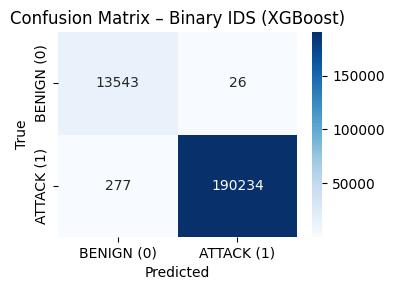

In [ ]:

y_proba = xgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
err = 1.0 - acc

print(f"Accuracy: {acc:.4f}")
print(f"Error:    {err:.4f}\n")


prec_macro, rec_macro, f1_macro, _ = precision_recall_fscore_support(
    y_test, y_pred, average="macro", zero_division=0
)
prec_weighted, rec_weighted, f1_weighted, _ = precision_recall_fscore_support(
    y_test, y_pred, average="weighted", zero_division=0
)

print(f"Macro Precision : {prec_macro:.4f}")
print(f"Macro Recall    : {rec_macro:.4f}")
print(f"Macro F1-score  : {f1_macro:.4f}\n")

print(f"Weighted Precision : {prec_weighted:.4f}")
print(f"Weighted Recall    : {rec_weighted:.4f}")
print(f"Weighted F1-score  : {f1_weighted:.4f}\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["BENIGN (0)", "ATTACK (1)"],
            yticklabels=["BENIGN (0)", "ATTACK (1)"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Binary IDS (XGBoost)")
plt.tight_layout()
plt.show()


In [ ]:
from copy import deepcopy

num_runs = 5
proba_runs = []

for seed in range(num_runs):
    model_r = xgb.XGBClassifier(
        max_depth=12,
        n_estimators=600,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        tree_method="hist",
        reg_lambda=1.0,
        reg_alpha=0.0,
        random_state=seed,
        n_jobs=-1
    )
    model_r.fit(X_train, y_train)
    p = model_r.predict_proba(X_test)[:, 1]
    proba_runs.append(p)

proba_runs = np.stack(proba_runs, axis=0)

y_true = y_test.astype(float)
mean_pred = proba_runs.mean(axis=0)

bias2 = np.mean((mean_pred - y_true)**2)

variance = np.mean(np.var(proba_runs, axis=0))

print(f"Approx. Bias^2 : {bias2:.6f}")
print(f"Approx. Variance: {variance:.6f}")
print(f"(Bias^2 + Variance ≈ {bias2 + variance:.6f})")


Approx. Bias^2 : 0.001245
Approx. Variance: 0.000005
(Bias^2 + Variance ≈ 0.001250)


In [ ]:
xgb_model.save_model("odids_xgb_binary.json")
print("Saved model as odids_xgb_binary.json")

np.save("odids_binary_feature_cols.npy", np.array(feature_cols))
print("Saved feature column names as odids_binary_feature_cols.npy")


Saved model as odids_xgb_binary.json
Saved feature column names as odids_binary_feature_cols.npy
